In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import sys
sys.path.append('./RSAlgorithms/')


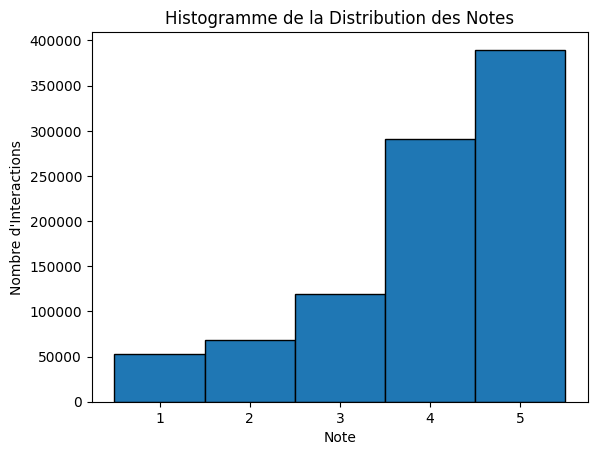

Nombre total d'interactions : 922267


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données des notes
# Remplacez 'path_to_ratings_file' par le chemin de votre fichier de notes
ratings = pd.read_csv('./RSAlgorithms/data/ep_ratings.txt', sep=' ', names=['user', 'item', 'rating'])

# Taille du réseau d'interaction
total_interactions = len(ratings)

# Distribution des notes
plt.hist(ratings['rating'], bins=range(1, ratings['rating'].max() + 2), edgecolor='black', align='left')
plt.title("Histogramme de la Distribution des Notes")
plt.xlabel("Note")
plt.ylabel("Nombre d'Interactions")
plt.xticks(range(1, ratings['rating'].max() + 1))
plt.show()

print(f"Nombre total d'interactions : {total_interactions}")






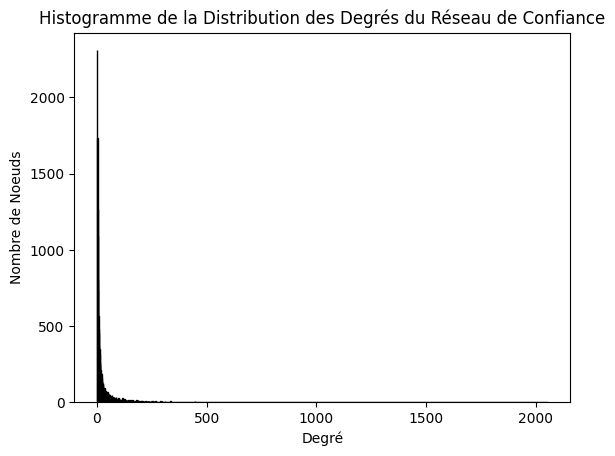

Nombre de nœuds dans le réseau de confiance : 18098
Nombre d'arêtes dans le réseau de confiance : 355727
Densité du réseau de confiance : 0.001086


In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Chargement des données de confiance
# Remplacez 'path_to_trust_file' par le chemin de votre fichier de confiance
trust_data = pd.read_csv('./RSAlgorithms/data/ep_trust.txt', sep=' ', names=['source', 'target', 'trust'])

# Création du réseau
G = nx.from_pandas_edgelist(trust_data, 'source', 'target', create_using=nx.DiGraph())

# Taille du réseau de confiance
network_nodes = G.number_of_nodes()
network_edges = G.number_of_edges()

# Densité du réseau
network_density = nx.density(G)

# Distribution des degrés
degree_distribution = [deg for node, deg in nx.degree(G)]

# Histogramme de la distribution des degrés
plt.hist(degree_distribution, bins=range(max(degree_distribution)+1), edgecolor='black')
plt.title("Histogramme de la Distribution des Degrés du Réseau de Confiance")
plt.xlabel("Degré")
plt.ylabel("Nombre de Noeuds")
plt.show()

print(f"Nombre de nœuds dans le réseau de confiance : {network_nodes}")
print(f"Nombre d'arêtes dans le réseau de confiance : {network_edges}")
print(f"Densité du réseau de confiance : {network_density:.6f}")


In [22]:
ratings_per_user = trust_data.groupby('source')['trust'].count()

# Calculate the average number of ratings per user
average_ratings_per_user = ratings_per_user.mean()

print(average_ratings_per_user)

23.02465859814899


In [48]:
from RSAlgorithms.utility.cross_validation import split_5_folds
from RSAlgorithms.configx.configx import ConfigX
import os 
import numpy as np
import pandas as pd

In [49]:
configx = ConfigX()

In [50]:
configx.rating_path

'./RSAlgorithms/data/ep10_ratings.txt'

In [51]:
# Faut faire ça jsp pourquoi MANGE TES MORTS LINDA
split_5_folds(configx)

D1
D2
D3
D4
ep10 -fold0 data generated finished!
ep10 -fold1 data generated finished!
ep10 -fold2 data generated finished!
ep10 -fold3 data generated finished!
ep10 -fold4 data generated finished!
All Data Generated Done!
